# 0. 라이브러리 설치

In [ ]:
! pip install seaborn matplotlib pandas

## 1. read csv into dataframe

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [211]:
df = pd.read_csv('./data/iris.csv')

## 2. 데이터의 기초 통계를 확인하고, 결측값이나 이상치를 처리합니다. 

### 기초 통계 

In [215]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 결측치 확인

In [218]:
df.isnull()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [220]:
df.isnull().sum() #결측치 개수

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [222]:
df[df['sepal.length'].isnull()] #특정 열이 결측된 행 보기 

,sepal.length,sepal.width,petal.length,petal.width,variety


In [224]:
df[df['sepal.length'].isnull() | df['sepal.width'].isnull()] #특정 열이 결측된 행 보기 - 복합 조건 OR

,sepal.length,sepal.width,petal.length,petal.width,variety


## 3. 막대 그래프를 생성하여 범주형 데이터의 분포를 시각화합니다.

In [227]:
df["variety"].unique() # variety 컬럼의 고유값을 확인 -> 범주형 데이터

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

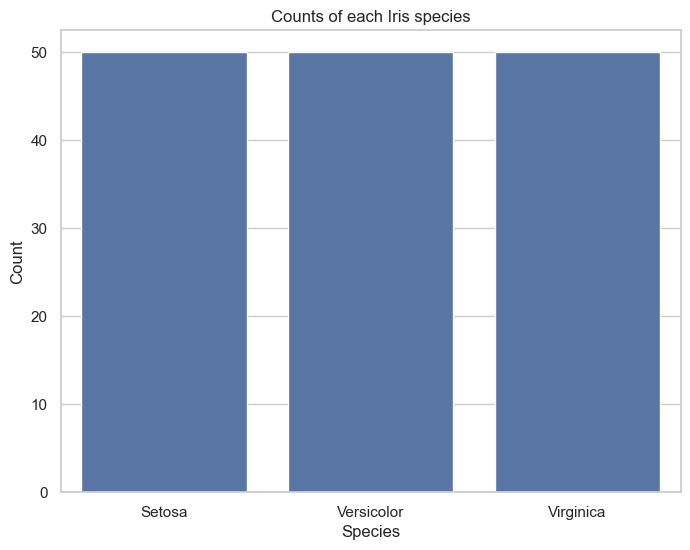

In [229]:
sns.set_theme(style = "whitegrid") #option setting 
variety_counts = df['variety'].value_counts() # 범주형 데이터 카테고리 별로 개수를 세어줌 => 시리즈 데이터 

# Plotting 
plt.figure(figsize=(8, 6))
sns.barplot(x=variety_counts.index, y = variety_counts.values) #시리즈의 인덱스와 벨류로 그래프 그림
plt.title("Counts of each Iris species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

###  분석 결과 정리 ) 세 종 다 동일한 빈도로 분포되어 있음. 

## 4. 선 그래프를 생성하여 시간에 따른 데이터의 변화를 시각화합니다.
- 언제 쓰는 가? 시간에 따른 값의 변화를 보고 싶을 때 
- 연도별로 CO2 level을 볼 것 이다(새로운 데이터: https://www.kaggle.com/datasets/ucsandiego/carbon-dioxide?resource=download)

In [233]:
co2 = pd.read_csv('./data/Carbon Dioxide Levels in Atmosphere.csv')
co2.describe()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
count,720.000000,720.000000,720.000000,703.000000,703.000000,707.000000,707.000000
mean,1987.500000,6.500000,1987.997492,352.375633,352.375206,352.054074,352.049830
std,17.330141,3.454452,17.332539,26.241884,26.171620,26.241431,26.178904
min,1958.000000,1.000000,1958.041100,313.210000,314.420000,312.450000,314.890000
25%,1972.750000,3.750000,1973.019900,328.555000,329.010000,328.340000,328.400000
50%,1987.500000,6.500000,1987.998600,349.800000,349.820000,349.370000,349.270000
75%,2002.250000,9.250000,2002.977425,373.195000,372.935000,372.840000,372.605000
max,2017.000000,12.000000,2017.956200,407.650000,406.040000,407.280000,405.830000


In [235]:
co2.notnull().sum() # 결측값 있음. 
co2 = co2.dropna() #약 18개의 데이터가 drop

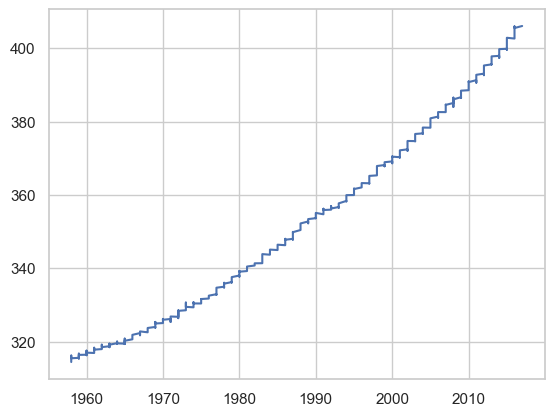

In [237]:
#plotting
plt.plot(co2.Year, co2['Seasonally Adjusted CO2 (ppm)'], label='Seasonally Adjusted CO2 (ppm)') #전체 데이터

## 5. 산점도를 생성하여 두 변수 간의 상관관계를 시각화합니다.
### - Q. 꽃잎(sepal) 길이와 꽃 받침(petal) 길이의 연관성이 있는가?


Text(0, 0.5, 'length of petal')

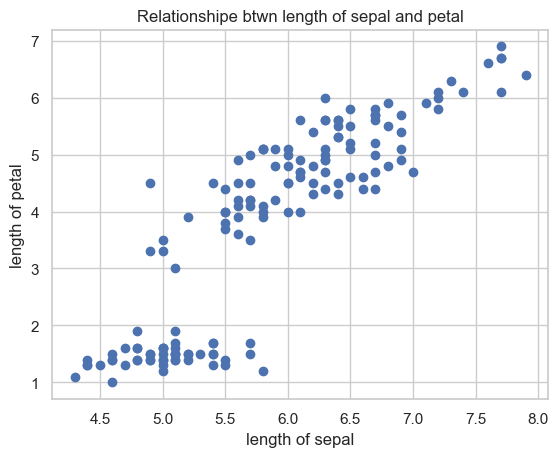

In [244]:
sepal_length = list(df['sepal.length'].values)
pedal_length = list(df['petal.length'].values)

plt.scatter(sepal_length, pedal_length)
plt.title("Relationshipe btwn length of sepal and petal")
plt.xlabel("length of sepal")
plt.ylabel("length of petal")

### 결론) 어느 정도 선형 그래프를 보인다.

## 6. 히스토그램을 생성하여 데이터의 분포를 시각화합니다.
- 히스토그램은 연속형 데이터의 빈도를 나타내는데 쓰임. cf) 막대그래프: 범주형 데이터
- 꽃받침 너비에 대한 히스토그램을 생성해보겠다.  

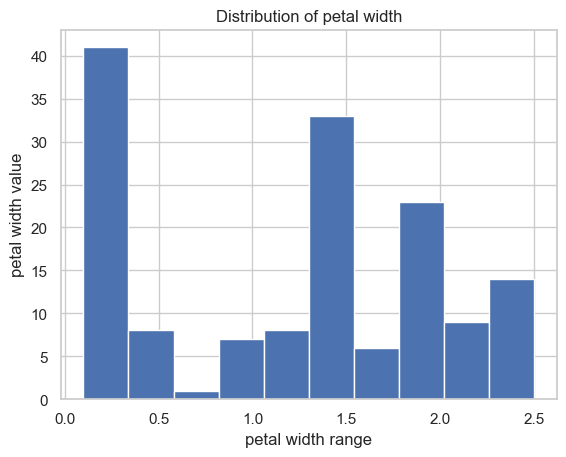

In [248]:
petal_width = list(df['petal.width'].values)
plt.hist(petal_width)
plt.title("Distribution of petal width")
plt.xlabel("petal width range")
plt.ylabel("petal width value")
plt.show()